# Data Science Challenge

In [1]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>
!pip install folium plotly tensorflow

     |████████████████████████████████| 95 kB 2.4 MB/s eta 0:00:011
     |████████████████████████████████| 26.5 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 497.5 MB 14 kB/s s eta 0:00:01
     |████████████████████████████████| 462 kB 73.8 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 72.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 51.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 6.0 MB/s  eta 0:00:01
     |████████████████████████████████| 42 kB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 5.8 MB 48.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 48.1 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 51.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.1 MB 47.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 5.7 MB/s  eta 0:00:01
     |█████████████████████████████

In [2]:
#Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [3]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [4]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [5]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [6]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [7]:
# info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
id                     2870 non-null int64
region                 2870 non-null object
latitude               2870 non-null float64
longitude              2870 non-null float64
accommodation_type     2870 non-null object
cost                   2870 non-null int64
minimum_nights         2870 non-null int64
number_of_reviews      2870 non-null int64
reviews_per_month      2194 non-null float64
owner_id               2870 non-null int64
owned_hotels           2870 non-null int64
yearly_availability    2870 non-null int64
dtypes: float64(3), int64(7), object(2)
memory usage: 269.2+ KB


In [8]:
# Checking if there is any null values in the dataset
data.isna().any()[lambda x:x]

reviews_per_month    True
dtype: bool

In [9]:
# replacing the null values with 0
data['reviews_per_month'].replace(np.NaN,0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
id                     2870 non-null int64
region                 2870 non-null object
latitude               2870 non-null float64
longitude              2870 non-null float64
accommodation_type     2870 non-null object
cost                   2870 non-null int64
minimum_nights         2870 non-null int64
number_of_reviews      2870 non-null int64
reviews_per_month      2870 non-null float64
owner_id               2870 non-null int64
owned_hotels           2870 non-null int64
yearly_availability    2870 non-null int64
dtypes: float64(3), int64(7), object(2)
memory usage: 269.2+ KB


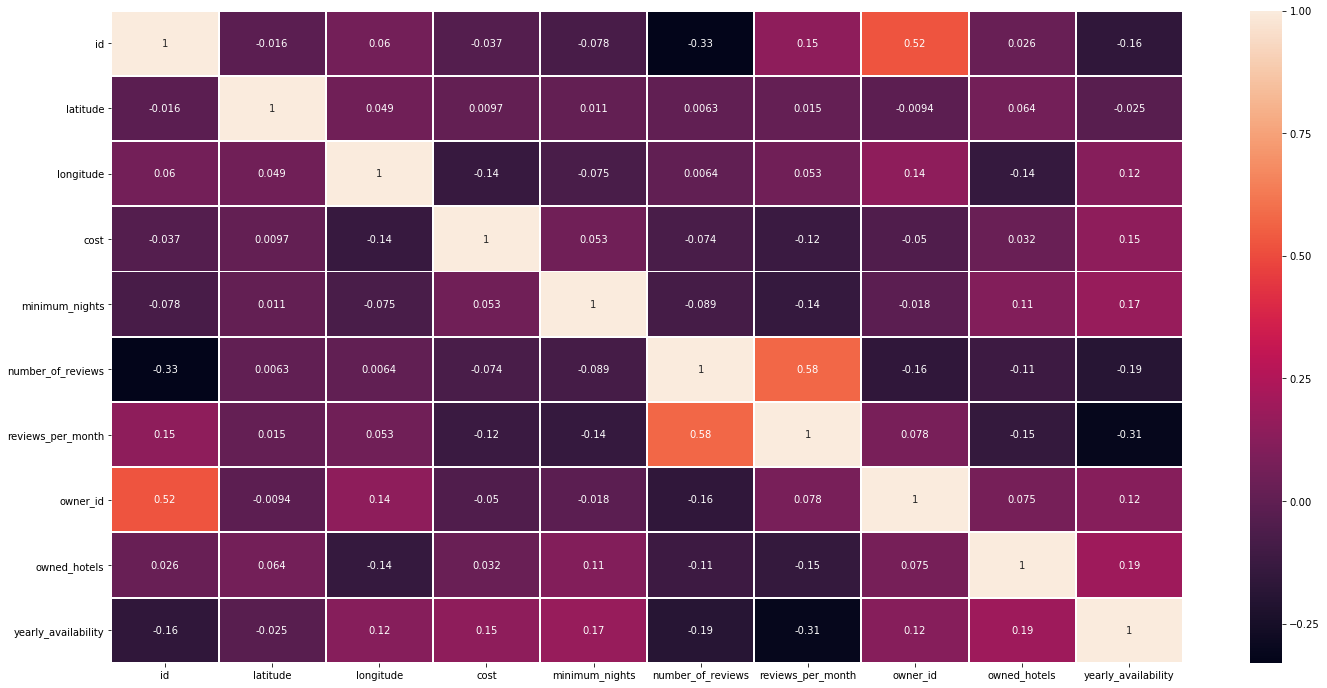

In [10]:
# visulizing Correlation matrix
plt.figure(figsize = (24, 12))
corr = data.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [11]:
# creating labels 
label=data['yearly_availability']
data=data.drop(['yearly_availability'],axis=1)
label

0       0
1       0
2       1
3       1
4       1
       ..
2865    1
2866    1
2867    0
2868    1
2869    1
Name: yearly_availability, Length: 2870, dtype: int64

In [12]:
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels'],
      dtype='object')

In [13]:
categorical_features = ['region','accommodation_type']
data[categorical_features]=data[categorical_features].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 11 columns):
id                    2870 non-null int64
region                2870 non-null category
latitude              2870 non-null float64
longitude             2870 non-null float64
accommodation_type    2870 non-null category
cost                  2870 non-null int64
minimum_nights        2870 non-null int64
number_of_reviews     2870 non-null int64
reviews_per_month     2870 non-null float64
owner_id              2870 non-null int64
owned_hotels          2870 non-null int64
dtypes: category(2), float64(3), int64(6)
memory usage: 207.8 KB


In [14]:
x=pd.get_dummies(data,prefix_sep='-',drop_first=True)

In [15]:
x.head()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,region-Brooklyn,region-Manhattan,region-Queens,region-Staten Island,accommodation_type-Private room,accommodation_type-Shared room
0,13232,40.71854,-74.00439,170,5,7,0.56,929983,1,0,1,0,0,0,0
1,246,40.64446,-73.95030,65,3,238,2.30,281764,1,1,0,0,0,0,0
2,19091,40.78573,-73.81062,85,1,0,0.00,19923341,1,0,0,1,0,1,0
3,34305,40.73863,-73.98002,210,30,0,0.00,200380610,65,0,1,0,0,1,0
4,444,40.82426,-73.94630,75,3,38,0.42,745069,3,0,1,0,0,0,1


## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [16]:
# Splitting the data into Train and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,label, test_size=.25,random_state=40)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2152, 15), (718, 15), (2152,), (718,))

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
#Predicting the model
y_pred_lr = lr.predict(X_test)
#Calculating the accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
#Confusion Matrix
conf = confusion_matrix(y_test, y_pred_lr)
#Classification report
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Accuracy Score of Logistic Regression is : 0.5710306406685237
Confusion Matrix : 
[[263  85]
 [223 147]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.54      0.76      0.63       348
           1       0.63      0.40      0.49       370

    accuracy                           0.57       718
   macro avg       0.59      0.58      0.56       718
weighted avg       0.59      0.57      0.56       718



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNN

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.6044568245125348
Confusion Matrix : 
[[233 115]
 [169 201]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       348
           1       0.64      0.54      0.59       370

    accuracy                           0.60       718
   macro avg       0.61      0.61      0.60       718
weighted avg       0.61      0.60      0.60       718



Decision Tree Classifier

In [23]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.8885793871866295
Confusion Matrix : 
[[313  35]
 [ 45 325]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       348
           1       0.90      0.88      0.89       370

    accuracy                           0.89       718
   macro avg       0.89      0.89      0.89       718
weighted avg       0.89      0.89      0.89       718



Random Forest Classifier

In [24]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9080779944289693
Confusion Matrix : 
[[316  32]
 [ 34 336]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       348
           1       0.91      0.91      0.91       370

    accuracy                           0.91       718
   macro avg       0.91      0.91      0.91       718
weighted avg       0.91      0.91      0.91       718



/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost Classifier

In [25]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.8885793871866295
Confusion Matrix : 
[[313  35]
 [ 45 325]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       348
           1       0.90      0.88      0.89       370

    accuracy                           0.89       718
   macro avg       0.89      0.89      0.89       718
weighted avg       0.89      0.89      0.89       718



Gradient Boosting Classifier

In [26]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9261838440111421
Confusion Matrix : 
[[322  26]
 [ 27 343]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       348
           1       0.93      0.93      0.93       370

    accuracy                           0.93       718
   macro avg       0.93      0.93      0.93       718
weighted avg       0.93      0.93      0.93       718



Model Comparison

In [27]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb]})


models.sort_values(by = 'Score', ascending = False)


,Model,Score
5,Gradient Boosting Classifier,0.926184
3,Random Forest Classifier,0.908078
2,Decision Tree Classifier,0.888579
4,Ada Boost Classifier,0.888579
1,KNN,0.604457
0,Logistic Regression,0.571031


However ANN can improve the accuracy but I have problem while installing tensorflow Here is my code for ANN:<br>
from tensorflow import keras<br>
from keras.layers import Dense<br>
from keras.models import Sequential<br>
model = Sequential()<br>
model.add(Dense(100, activation = 'relu', input_shape = (15, )))<br>
model.add(Dense(100, activation = 'relu'))<br>
model.add(Dense(2, activation = 'sigmoid'))<br>
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])<br>
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 100)<br>



In [39]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [40]:
test_data['reviews_per_month'].replace(np.NaN,0,inplace=True)
categorical_features = ['region','accommodation_type']
test_data[categorical_features]=test_data[categorical_features].astype('category')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 11 columns):
id                    718 non-null int64
region                718 non-null category
latitude              718 non-null float64
longitude             718 non-null float64
accommodation_type    718 non-null category
cost                  718 non-null int64
minimum_nights        718 non-null int64
number_of_reviews     718 non-null int64
reviews_per_month     718 non-null float64
owner_id              718 non-null int64
owned_hotels          718 non-null int64
dtypes: category(2), float64(3), int64(6)
memory usage: 52.3 KB


In [41]:
x1=pd.get_dummies(test_data,prefix_sep='-',drop_first=True)

In [42]:
# from the above mentioned models, Gradient Boosting has highest accuracy so I choose Gradient Boosting to predict test_data
y_pred_gb_test = gb.predict(x1)

In [43]:
id=list(test_data['id'])

In [44]:
submission_df=pd.DataFrame({'id':id,'yearly_availability':y_pred_gb_test})

In [45]:
submission_df.head()

,id,yearly_availability
0,19215,0
1,36301,0
2,40566,1
3,33694,0
4,28873,0




**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


Feature: 0, Score: 0.01818
Feature: 1, Score: 0.01510
Feature: 2, Score: 0.01694
Feature: 3, Score: 0.00959
Feature: 4, Score: 0.01254
Feature: 5, Score: 0.00819
Feature: 6, Score: 0.04689
Feature: 7, Score: 0.00906
Feature: 8, Score: 0.20474
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00082
Feature: 11, Score: 0.00281
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.57453
Feature: 14, Score: 0.08061


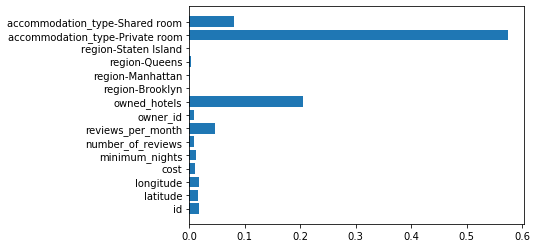

In [55]:
# Feature importance by using gradient boosting
importance = gb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh(x.columns[0:len(x.columns)], importance)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

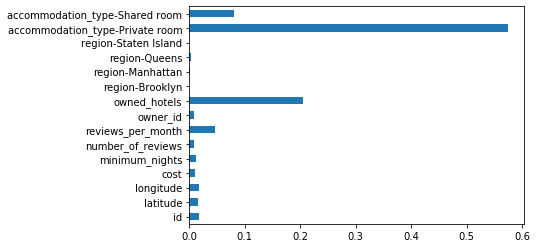

In [50]:
# Feature importance using Information Gain
from sklearn.feature_selection import mutual_info_classif
importance1=mutual_info_classif(x,label)
feature_importance=pd.Series(importance, x.columns[0:len(x.columns)])
feature_importance.plot(kind='barh')
plt.show

For the given data "Accommodation type" is the important feature

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [46]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---